<a href="https://colab.research.google.com/github/Leetora41053/sesac_practice/blob/main/12_1_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()

        self.conv_path = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                      kernel_size=3, padding=1, stride=stride),
            nn.ReLU(),
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels,
                      kernel_size=3, padding=1)
        )

        if stride == 1:
          self.skip_path = nn.Identity()
        else:
          self.skip_path = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, padding=1, stride=2)


        self.out_act = nn.ReLU()

    def forward(self, x):
        x_conv = self.conv_path(x)
        x_skip = self.skip_path(x)
        x = x_conv + x_skip
        x = self.out_act(x)

        return x

In [ ]:
class ResNet34(nn.Module):
  def __init__(self, in_channels):
    super(ResNet34, self).__init__()
    self.conv1 = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=7, stride=2, padding=3),
                 nn.ReLU())

    self.conv2_x = self._make_layers(self, in_channels=64, out_channels=64, n_blocks=3, downsample=0)
    self.conv3_x = self._make_layers(self, in_channels=128, out_channels=128, n_blocks=4, downsample=1)
    self.conv4_x = self._make_layers(self, in_channels=256, out_channels=256, n_blocks=6, downsample=1)
    self.conv5_x = self._make_layers(self, in_channels=512, out_channels=512, n_blocks=3, downsample=1)


    self.conv2_x = nn.Sequential(
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
                ResidualBlock(in_channels=64, out_channel=64),
                ResidualBlock(in_channels=64, out_channel=64),
                ResidualBlock(in_channels=64, out_channel=64)
    )

    self.conv3_x = nn.Sequential(
                ResidualBlock(in_channels=64, out_channels=128, stride=2),
                ResidualBlock(in_channels=128, out_channel=128),
                ResidualBlock(in_channels=128, out_channel=128),
                ResidualBlock(in_channels=128, out_channel=128)
    )

    self.conv4_x = nn.Sequential(
                ResidualBlock(in_channels=128, out_channels=256, stride=2),
                ResidualBlock(in_channels=256, out_channel=256),
                ResidualBlock(in_channels=256, out_channel=256),
                ResidualBlock(in_channels=256, out_channel=256),
                ResidualBlock(in_channels=256, out_channel=256),
                ResidualBlock(in_channels=256, out_channel=256),
    )

    self.conv5_x = nn.Sequential(
                ResidualBlock(in_channels=256, out_channels=512, stride=2),
                ResidualBlock(in_channels=512, out_channel=512),
                ResidualBlock(in_channels=512, out_channel=512)
    )

    self.avg_pool = nn.Sequential(nn.AvgPool2d(kernel_size=7, stride=1, padding=0),
                   nn.AvgPool2d(kernel_size=7, stride=7),
                   nn.Linear(in_features=512*1*1 , out_features=1000),
                  )


  def _make_layers(self, in_channels, out_channels, n_blocks, downsample):
    self.layers = []

    #1번. 빈 레이어에 residual block을 집어넣어
    for _ in range(n_blocks):
      self.layers.append(ResidualBlock(in_channels=in_channels, out_channels=out_channels,
                                         kernel_size=3, padding=1))

    #2번.
      if downsample = 0:
        self.skip_path = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, padding=1, stride=2)




  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2_x(x)
    x = self.conv3_x(x)
    x = self.conv4_x(x)
    x = self.conv5_x(x)

    x = x.view(x.shape[0],-1)
    x = self.out_act(x)

    return x

# Overfitting

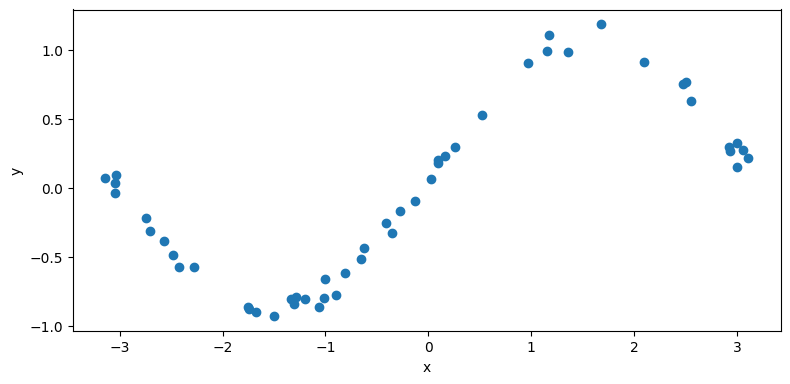

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N_SAMPLE = 50

x = np.random.uniform(-np.pi, np.pi, N_SAMPLE)
y = np.sin(x) + 0.2 * np.random.rand(N_SAMPLE)
#np.random.normal(0, 0.1, N_SAMPLE)이라고 표현할 수도 있음

fig, ax = plt.subplots(figsize=(8,4))

ax.set_xlabel('x')
ax.set_ylabel('y')
for spine_loc in ax.spines.items():
  if spine_loc in ['right', 'top']:
    spine.set_visible(False)
# ax.spine['right'].set_color('none')
# ax.spine['top'].set_color('none')


fig.tight_layout()

plt.scatter(x, y)
plt.show()

In [ ]:
import numpy as np
import torch

def get_sin_ds(n_samples):
  x_ds = np.random.uniform(-np.pi, np.pi, n_samples)
  y_ds = np.sin(x) + 0.2 * np.random.rand(n_samples)

  return x_ds, y_ds

def get_device():
  if torch.cuda.is_available(): device = 'cuda'
  elif torch.backends.mps.is_available(): device = 'mps'
  else: device = 'cpu'
  return device

In [ ]:
import torch.nn as nn

class SinRegressor(nn.Module):
  def __init__(self):
    super(SinRegressor, self).__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features=1, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=1)
        #마지막에 relu가 없는 것으로 regression모델이라는 걸 알 수 잇음
    )

  def forward(self, x):
    x = self.layers(x)
    return x

In [ ]:
#optimizer를 쓸 때 LR를 조절해주는 함수